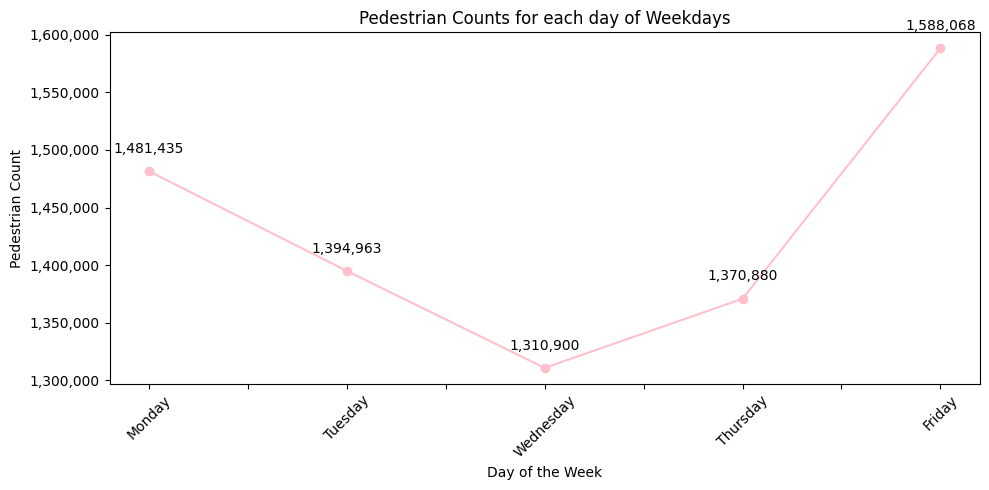

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(file_path)

# Convert 'hour_beginning' column to datetime
data['hour_beginning'] = pd.to_datetime(data['hour_beginning'])

# Filter the data to include only weekdays
data['weekday'] = data['hour_beginning'].dt.dayofweek
weekday_data = data[(data['weekday'] >= 0) & (data['weekday'] <= 4)]

# Group by day of the week and sum pedestrians
weekday_counts = weekday_data.groupby(weekday_data['hour_beginning'].dt.day_name())['Pedestrians'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Plot a line graph
plt.figure(figsize=(10, 5))
weekday_counts.plot(kind='line', marker='o', color='pink')
plt.title('Pedestrian Counts for each day of Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Count')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add data labels
for x, y in zip(range(len(weekday_counts)), weekday_counts):plt.text(x, y + max(weekday_counts) * 0.01, f'{int(y):,}', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

# Load the dataset
file_path = ' https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(file_path)

# Convert 'hour_beginning' column to datetime
data['hour_beginning'] = pd.to_datetime(data['hour_beginning'])

# Filter for the year 2019
data_2019 = data[data['hour_beginning'].dt.year == 2019]

# One-hot encode the weather conditions
weather_encoded = pd.get_dummies(data_2019['weather_summary'])

# Combine the pedestrian counts with the encoded weather conditions
combined_data = pd.concat([data_2019['Pedestrians'], weather_encoded], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Extract the correlations between weather conditions and pedestrian counts
weather_correlations = correlation_matrix['Pedestrians'].sort_values(ascending=False)

# Output the correlations
print(weather_correlations)

Pedestrians            1.000000
partly-cloudy-day      0.497867
clear-day              0.339758
wind                  -0.000170
sleet                 -0.017091
fog                   -0.026457
snow                  -0.034052
cloudy                -0.081255
rain                  -0.138581
partly-cloudy-night   -0.282081
clear-night           -0.377297
Name: Pedestrians, dtype: float64


time_of_day
morning      2480582
afternoon    5852025
evening      2432145
night         268114
Name: Pedestrians, dtype: int64


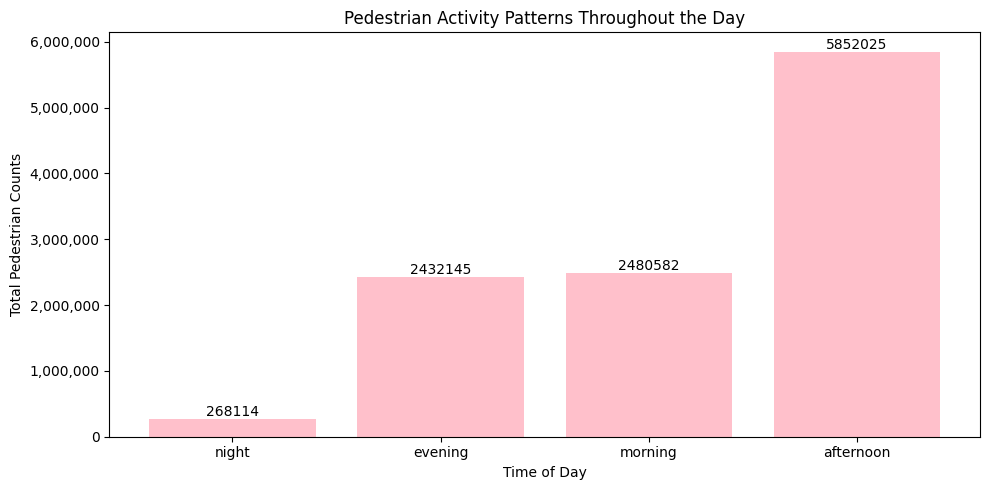

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the dataset
file_path = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(file_path)

# Convert 'hour_beginning' column to datetime
data['hour_beginning'] = pd.to_datetime(data['hour_beginning'])

# Define a custom function to categorize times of day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply the function to the hour of the 'hour_beginning' column to create a 'time_of_day' column
data['time_of_day'] = data['hour_beginning'].dt.hour.apply(categorize_time_of_day)

# Group the data by the new 'time_of_day' column and sum the pedestrian counts
time_of_day_counts = data.groupby('time_of_day')['Pedestrians'].sum().reindex(['morning', 'afternoon', 'evening', 'night'])

# Output the results
print(time_of_day_counts)
sorted_time_of_day_counts = time_of_day_counts.sort_values()

plt.figure(figsize=(10, 5))
bars = plt.bar(sorted_time_of_day_counts.index, sorted_time_of_day_counts.values, color='pink')  # Plot bars and save to a variable
plt.title('Pedestrian Activity Patterns Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Counts')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()